### **1. Distribuzioni di probabilità**

1. Genera 1000 valori casuali da una distribuzione gamma con parametro di forma (PDF) pari a 1.
Suggerimento: il parametro di forma viene passato come primo argomento quando si "congela" la distribuzione.

2. Traccia l’istogramma del campione e sovrapponi la PDF della distribuzione.

3. Stima il parametro di forma dal campione usando il metodo fit.

Extra: 

Le distribuzioni hanno molti metodi utili. Esplorali usando il completamento automatico con il tasto TAB.

4. Traccia la funzione di distribuzione cumulativa (CDF).

5. Calcola la varianza.

***Punto 1: Genera 1000 valori casuali da una distribuzione Gamma con parametro di forma (PDF) = 1***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Genero 1000 valori dalla distribuzione gamma con shape = 1
np.random.seed(0)       # Per risultati riproducibili
sample = gamma.rvs (a=1, size=1000)

# Visualizzo le prime 5 opzioni
print(sample[:5])

[0.79587451 1.25593076 0.92322315 0.78720115 0.55104849]


***Punto 2: Istogramma del campione + PDF sovrapposta***

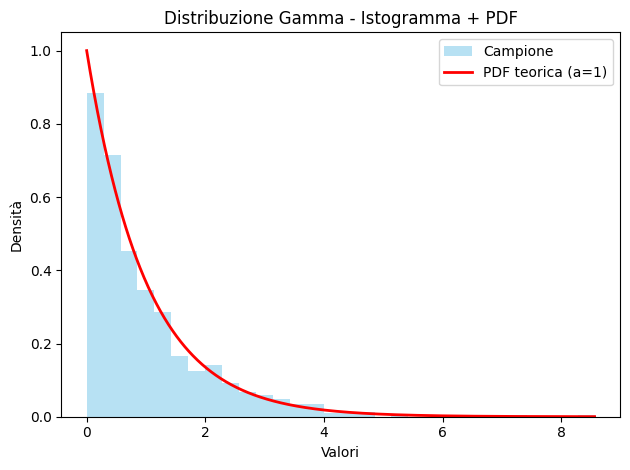

In [4]:
# Traccio l'istogramma dei dati osservati
plt.hist(
    sample,             # Campione generato 
    bins=30,            # Numero di suddivisioni dell'intervallo
    density=True,       # Normalizza l'area sotto l'istogramma a 1 (per confrontarla con la PDF)
    alpha=0.6,          # Trasparenza delle barre
    color="skyblue",    # Colore istogramma
    label="Campione")   # Etichetta

# Creo un array di valori su cui valutare la PDF
x = np.linspace(0, sample.max(), 1000)

# Calcolo la PDF teorica della distribuzione gamma con parametro a=1
pdf = gamma.pdf(x, a=1)

# Traccio la PDF teorica
plt.plot(
    x, pdf,                     # Asse x e y 
    "r-",                       # Linea rossa continua
    lw=2,                       # Spessore linea
    label="PDF teorica (a=1)")  # Etichetta

# Aggiungo il titolo e le etichette per gli assi
plt.title("Distribuzione Gamma - Istogramma + PDF")
plt.xlabel("Valori")
plt.ylabel("Densità")

# Legenda
plt.legend()

#  Sistema layout per non far sovrapporre elementi
plt.tight_layout()

# Mostra il grafico
plt.show()

## INFO: Questo grafico mostra:
#       - Le FREQUENZE OSSERVATE nel campione (hist);
#       - La CURVA TEORICA DELLA PDF gamma con shape=1 (gamma.pdf)

# Questo mi permette di visualizzare il COMPORTAMENTO EMPIRICO VS TEORICO della distribuzione gamma

***Punto 3: Stima dei parametri con fit***

In [6]:
# Stimo i parametri della distribuzione gamma dal campione.    Restituisce: (loc, scale, shape)
loc, scale, shape = gamma.fit(sample)

# Stampo i risultati
print(f"Parametro loc: {loc:.4f}")
print(f"Parametro scale: {scale:.4f}")
print(f"Parametro di forma (a): {shape:.4f}")

## INFO: 
#   - fit(): Usa la MASSIMA VEROSIMIMIGLIANZA per stimare i parameti
#   - gamma.fit(): Restituisce 3 VALORI: loc, scale e shape (dove a = shape)

#                  -> LOC(Parametro di traslazione): Sposta la distribuzione lungo l'asse x.    
#                           Es: Se loc=0, la distribuzione inizia da 0

#                  -> SCALE (Fattore di scala): Allarga o restringe la distribuzione            
#                           Es: Piu' scale è grande, più la curva è "larga"

#                  -> SHAPE/a (Parametro di forma): Definisce la distribuzione gamma
#                           Es: a = 1: Distribuzione Esponenziale     
#                           Es: a > 1: Curva più simmetrica

Parametro loc: 0.9745
Parametro scale: 0.0005
Parametro di forma (a): 1.0274


***Punto 4: Traccia la CDF (funzione di ripartizione cumulativa) della distribuzione Gamma***

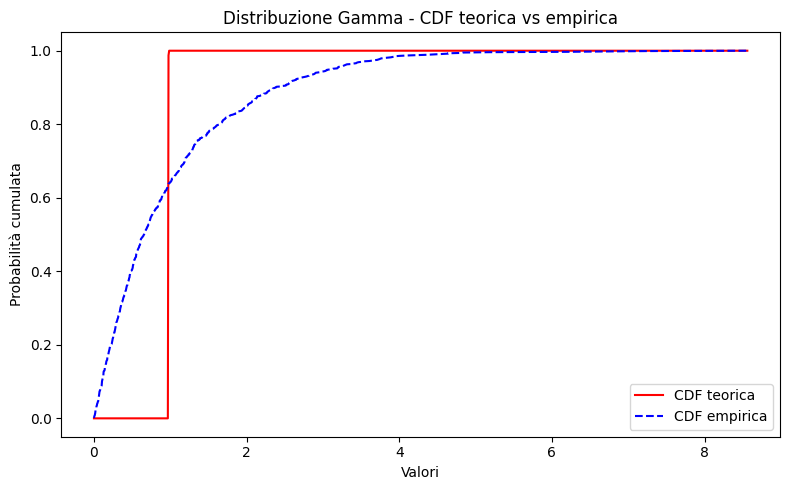

In [ ]:
# Creo un array di x su cui valutare la CDF
x = np.linspace(0, sample.max(), 1000)

# Calcolo la CDF teorica con i parametri stimati
cdf_teorica = gamma.cdf (x, a=shape, loc=loc, scale=scale)

# Calcolo la CDF empirica del campione (con istogramma cumulativo)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)         # CDF empirica del campione

# Creo la figura per il confronto
plt.figure(figsize=(8, 5))  

# Traccio la PDF teorica
plt.plot(
    x, 
    cdf_teorica, 
    label="CDF teorica", 
    color="red")

# Traccio la CDF empirica ottenuta dai dati
plt.plot(
    ecdf.x, 
    ecdf.y, 
    label="CDF empirica", 
    linestyle="--", 
    color="blue")

# # Aggiungo il titolo e le etichette per gli assi
plt.title("Distribuzione Gamma - CDF teorica vs empirica")
plt.xlabel("Valori")
plt.ylabel("Probabilità cumulata")

# Legenda
plt.legend()

# Miglioro il layout
plt.tight_layout()

# Mostra il grafico
plt.show()

## INFO: Questo grafico confronta:
#       - La CURVA CUMULATRA TEORICA, basata sui parametri stimati
#       - La DISTRIBUZIONE CUMULATIVA REALE osservata dal campione

# Il confronto mostra quanto bene la distribuzione stimata si adatta ai dati reali.

***Punto 5: Calcolo della varianza***

In [10]:
# Calcolo la varianza del campione
varianza = np.var(sample)
print(f"Varianza del campione: {varianza:.4f}")

# Calcolo la varianza teorica stimata dal fit
var_teorica = gamma.var(a=shape, loc=loc, scale=scale)
print(f"Varianza teorica stimata: {var_teorica:.4f}")

## INFO: Calcolare la varianza, significa calcolare 
#        quanto i dati sono "sparsi" intorno alla media

Varianza del campione: 1.0590
Varianza teorica stimata: 0.0000


### **2. Fitta i dati**
Prova a fittare i dati sottostante con le migliori curve, calcola il MAE e l'RMSE

Text(0, 0.5, 'Min and max temperature')

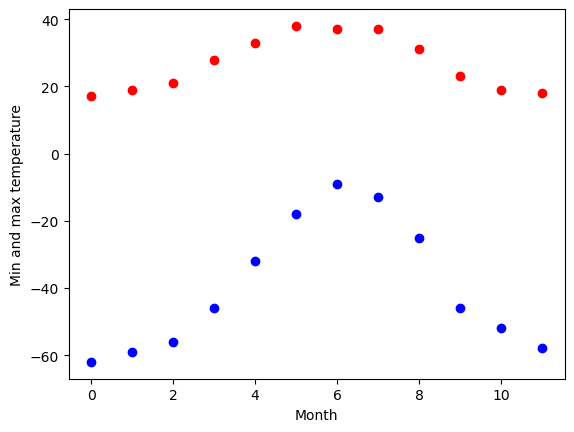

In [5]:
import numpy as np
temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")


### **2. Modello di regressione lineare dei seguenti dati**

 Calcola un modello di regressione lineare delle colonne mpg e disp del famoso dataset mtcars.

Dove: 

mpg = Miles Per Gallon → miglia per gallone, cioè una misura del consumo di carburante. Più alto è il valore, più efficiente è l’auto.

disp = Displacement → cilindrata del motore, in pollici cubici (cubic inches). Rappresenta il volume totale dei cilindri del motore. Più è alto, maggiore è la potenza potenziale del motore (ma anche il consumo).

In [2]:
import pandas as pd

# Load dataset from URL
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

# Display the dataframe
df


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
